In [1]:
# python imports
import numpy as np
import pandas as pd
import sktime
import os
import seaborn as sns
# from sktime.datasets import load_from_tsfile_to_dataframe
import matplotlib.pyplot as plt

# Analiza echilibrului de clase

In [2]:
label = ['shoe', 'laptop', 'cup', 'camera', 'bottle', 'book', 'cereal_box', ]
train_data = [301, 305, 306, 308, 303, 304, 307]
test_data = [310, 304, 305, 300, 303, 307, 307]
full_data = [611, 610, 611, 608, 606, 611, 614]
print(full_data)

[611, 610, 611, 608, 606, 611, 614]


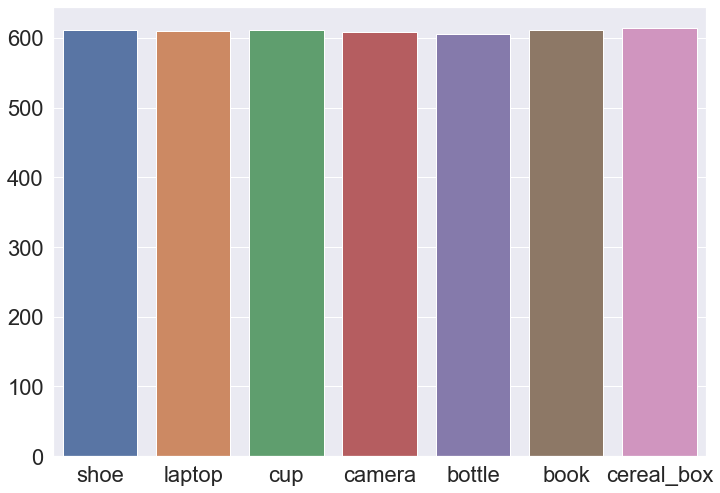

In [15]:
# Train data 
sns.set_theme(style="whitegrid")


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 2)
# ax = sns.barplot(x=label, y=test_data)
ax = sns.barplot(x=label, y=train_data)
ax = sns.barplot(x=label, y=full_data)

# sns.set_theme(style="whitegrid")

# ax = sns.countplot(x=train_y, order=["1.0", "2.0", "3.0", "4.0", "5.0", "6.0", "7.0"])
# sns.set(font_scale = 1)
# plt.title('Train data')
# plt.savefig('PEMS-SF_graphs/PEMS-SF_countplot_train_data.png')

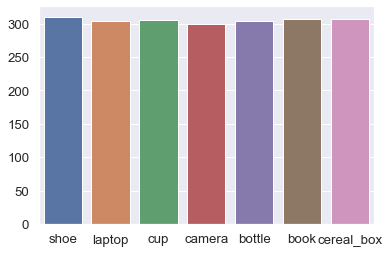

In [12]:
# Test data
ax = sns.barplot(x=label, y=test_data)

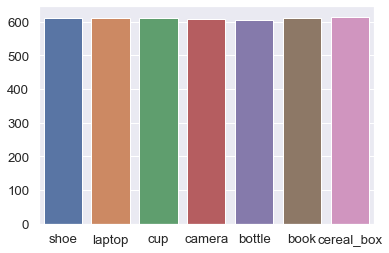

In [13]:
# Full data
ax = sns.barplot(x=label, y=full_data)

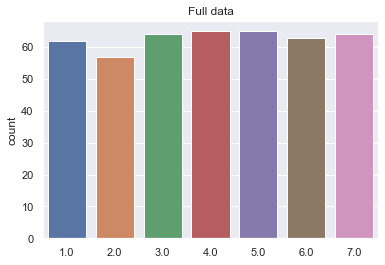

In [7]:
# Print entire data set
full_y = np.concatenate((train_y, test_y))
ax = sns.countplot(x=full_y, order=["1.0", "2.0", "3.0", "4.0", "5.0", "6.0", "7.0"])
plt.title('Full data')
plt.savefig('PEMS-SF_graphs/PEMS-SF_countplot_full_data.png')

# Diagrame sugerate

## Gradul de variere a ratei de ocupare pentru 8 zile uniform distrubuite de-a lungul anului de inregistrari

In [8]:
# Graph 3.1
uniform_8_days = [33 * i for i in range(8)] # every 33 day starting with day 0

In [9]:
day_mean_for_each_sensor = {'day': [], 'sensor': [], 'mean_occupation_rate': [], 'std': []}

for i, day in enumerate(uniform_8_days):
    print(i)
    for dim in train_x:
        day_mean_for_each_sensor['day'].append(day)
        day_mean_for_each_sensor['sensor'].append(dim)
        tmp = train_x[dim][day].describe()
        day_mean_for_each_sensor['mean_occupation_rate'].append(tmp['mean'])
        day_mean_for_each_sensor['std'].append(tmp['std'])

0
1
2
3
4
5
6
7


In [10]:
mean_ocupation_rate_8_days = pd.DataFrame(data=day_mean_for_each_sensor)

In [11]:
mean_ocupation_rate_8_days

,day,sensor,mean_occupation_rate,std
0,0,dim_0,0.043922,0.023607
1,0,dim_1,0.043384,0.035799
2,0,dim_2,0.066555,0.039895
3,0,dim_3,0.047730,0.035879
4,0,dim_4,0.025681,0.018447
...,...,...,...,...
7699,231,dim_958,0.034610,0.019752
7700,231,dim_959,0.068932,0.048369
7701,231,dim_960,0.030446,0.019764
7702,231,dim_961,0.060712,0.044660


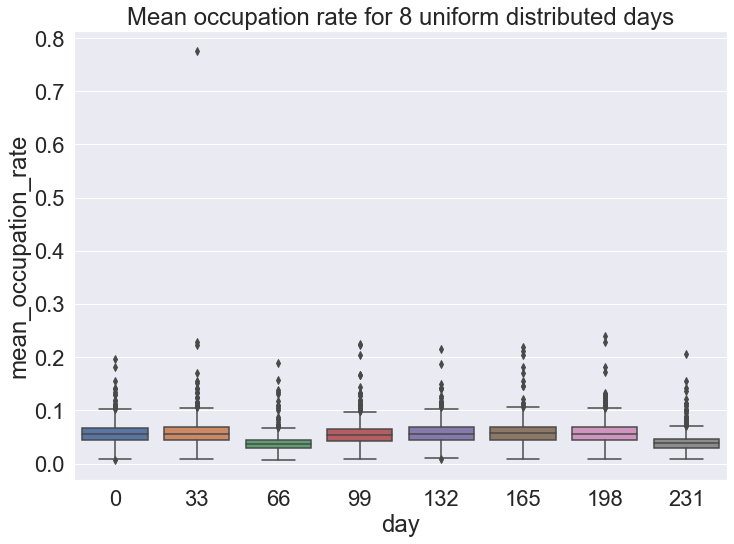

In [12]:
# sns.set(rc = {'figure.figsize':(10,10)}) # increase plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 2)
ax = sns.boxplot(x="day", y="mean_occupation_rate", data=mean_ocupation_rate_8_days)
plt.title('Mean occupation rate for 8 uniform distributed days')
plt.savefig('PEMS-SF_graphs/PEMS-SF_mean_occupation_rate_8_days.png')

## Deviatia standard a ratei de ocupare din cursul zilei pentru top 10 senzori ordonati descrescator

In [13]:
top_10_sensors_dec = {}

for dim in train_x:
    top_10_sensors_dec[dim] = mean_ocupation_rate_8_days[mean_ocupation_rate_8_days['sensor'] == dim]['std'].describe()['mean']

In [14]:
top_10_sensors_dec = sorted(top_10_sensors_dec, key=top_10_sensors_dec.get, reverse=True)[0:10]

In [15]:
top_10_sensors_dec

['dim_716',
 'dim_192',
 'dim_618',
 'dim_776',
 'dim_666',
 'dim_723',
 'dim_649',
 'dim_276',
 'dim_736',
 'dim_677']

In [16]:
top_10_sensors_std = mean_ocupation_rate_8_days[mean_ocupation_rate_8_days['sensor'] == top_10_sensors_dec[0]]

for i in range(1, len(top_10_sensors_dec)):
    top_10_sensors_std = pd.concat([top_10_sensors_std, mean_ocupation_rate_8_days[mean_ocupation_rate_8_days['sensor'] == top_10_sensors_dec[i]]])

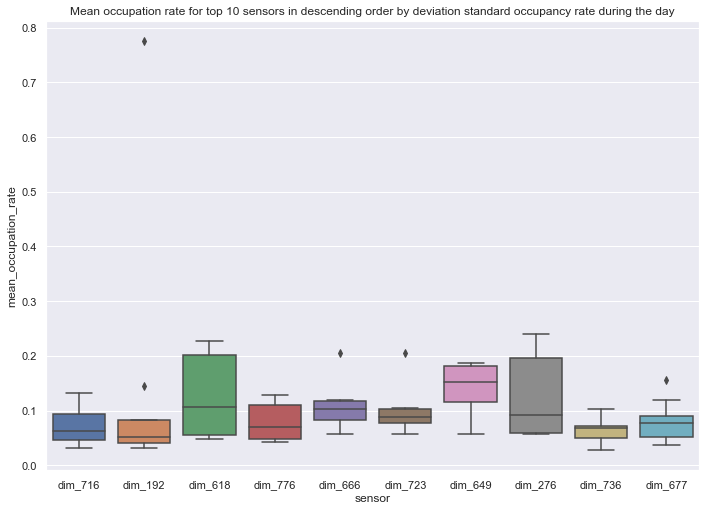

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1)
plt.title('Mean occupation rate for top 10 sensors in descending order by deviation standard occupancy rate during the day')
ax = sns.boxplot(x="sensor", y="mean_occupation_rate", data=top_10_sensors_std)
plt.savefig('PEMS-SF_graphs/PEMS-SF_mean_occupation_rate_10_sensors_desc.png')

In [18]:
top_10_sensors_std

,day,sensor,mean_occupation_rate,std
716,0,dim_716,0.092559,0.142775
1679,33,dim_716,0.046406,0.031855
2642,66,dim_716,0.032426,0.021439
3605,99,dim_716,0.131777,0.184476
4568,132,dim_716,0.097132,0.151605
...,...,...,...,...
3566,99,dim_677,0.075478,0.078681
4529,132,dim_677,0.081135,0.080043
5492,165,dim_677,0.053612,0.053193
6455,198,dim_677,0.119767,0.121427


## 2 Deviatia standard a ratei de ocupare din cursul zilei pentru top 10 senzori ordonati descrescator

0


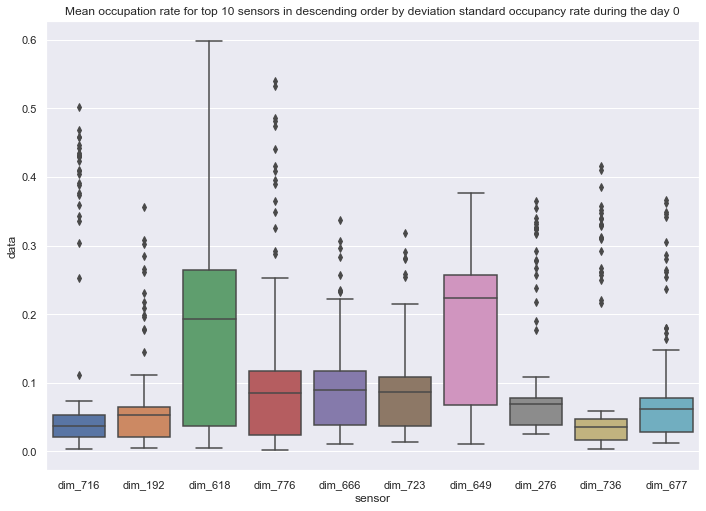

1


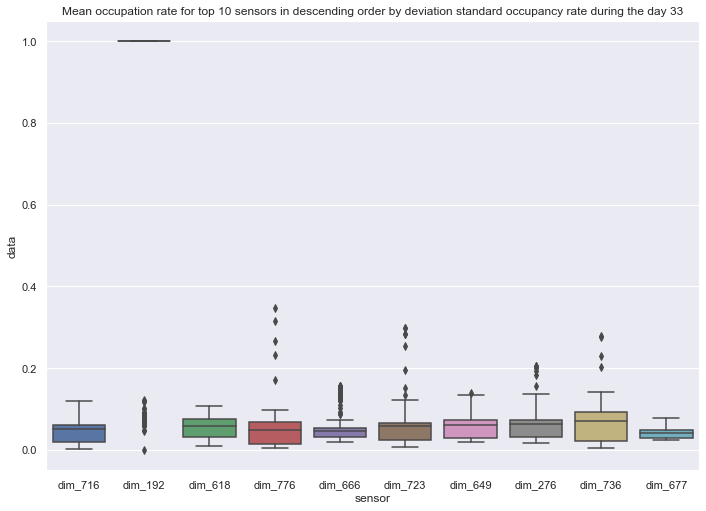

2


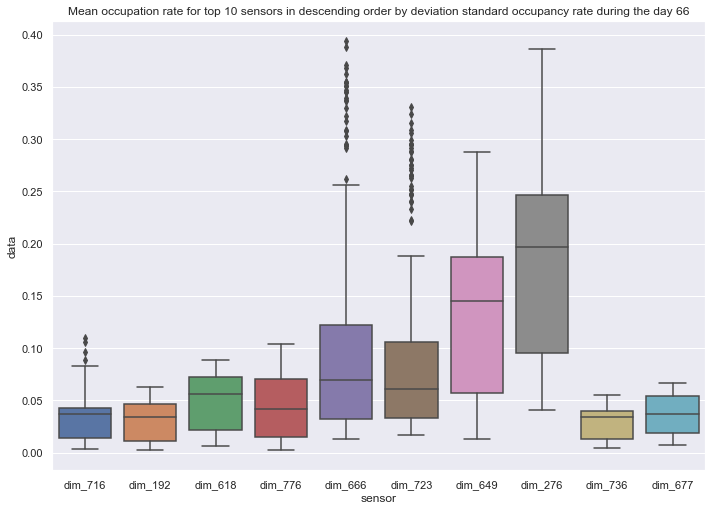

3


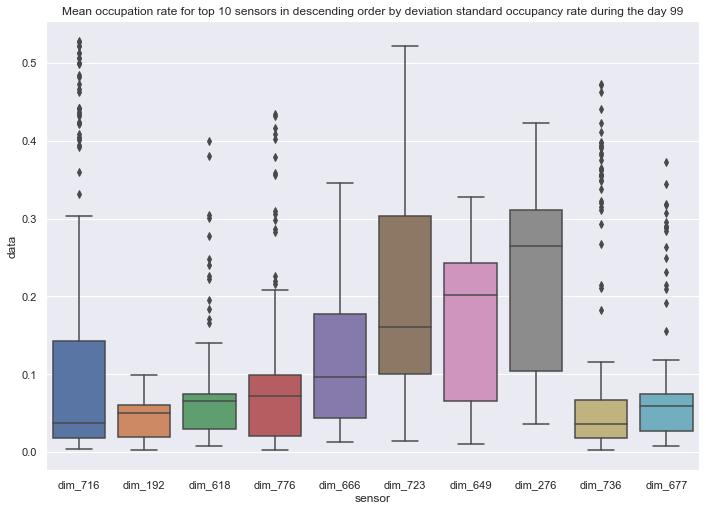

4


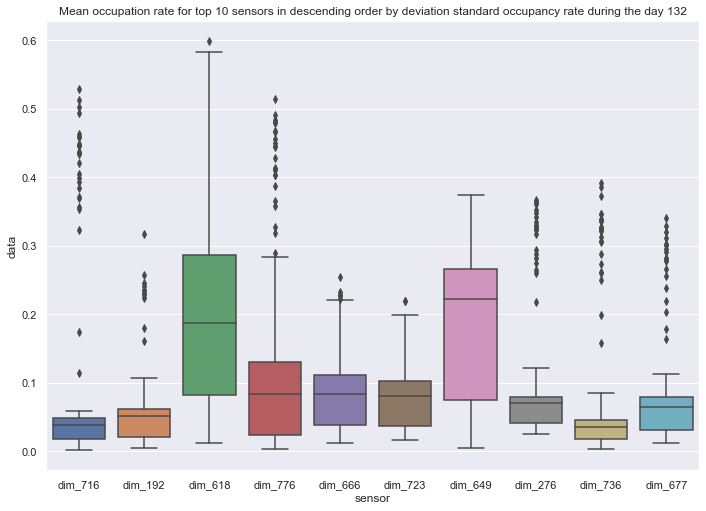

5


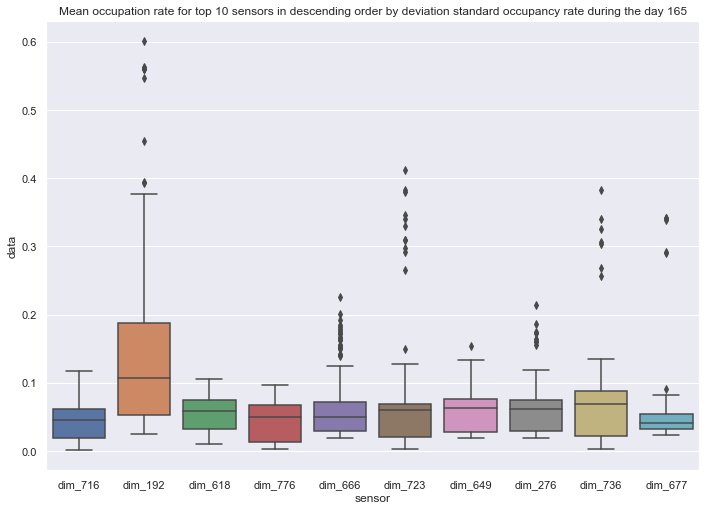

6


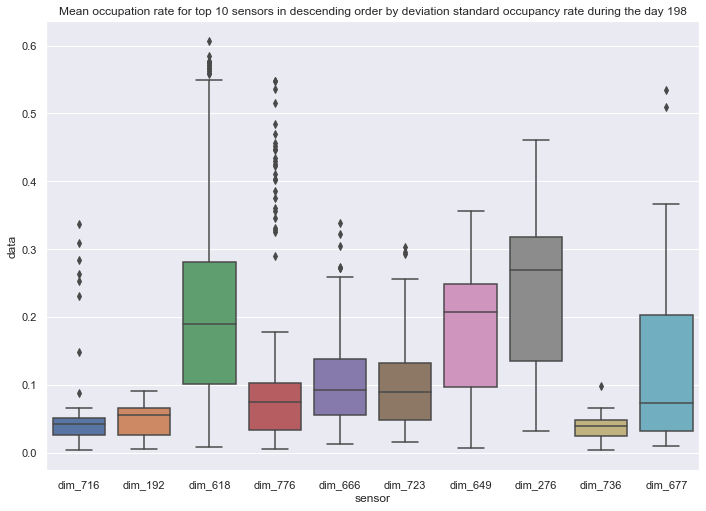

7


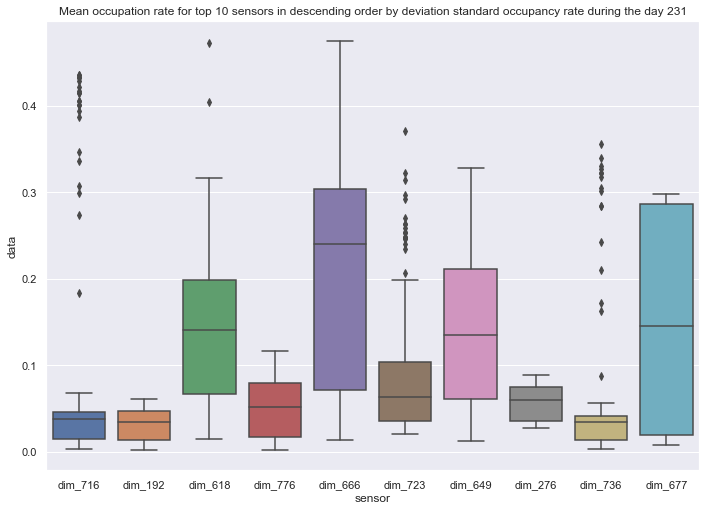

In [19]:
day_mean_for_each_sensor2 = {'sensor': [], 'data': [], 'std': []}

for i, day in enumerate(uniform_8_days):
    print(i)
    day_mean_for_each_sensor2 = {'sensor': [], 'data': [], 'std': []}
    for dim in top_10_sensors_dec:
        
        for data in train_x[dim][day]:
            day_mean_for_each_sensor2['sensor'].append(dim)
            day_mean_for_each_sensor2['data'].append(data)
            day_mean_for_each_sensor2['std'].append(tmp['std'])
            
    tmp = pd.DataFrame(day_mean_for_each_sensor2)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set(font_scale = 1)
    plt.title('Mean occupation rate for top 10 sensors in descending order by deviation standard occupancy rate during the day ' + str(day))
    sns.boxplot(x="sensor", y="data", data=tmp)
    plt.savefig('PEMS-SF_graphs/PEMS-SF_mean_occupation_rate_10_sensors_desc_day_' + str(i) + '.png')
    plt.show()

In [20]:
train_x['dim_0'][0]

0      0.0154
1      0.0085
2      0.0099
3      0.0108
4      0.0100
        ...  
139    0.0152
140    0.0154
141    0.0117
142    0.0116
143    0.0120
Length: 144, dtype: float64

In [21]:
# Graph 3.3
# media zilnica a ratei de ocupare pentru fiecare senzor
daily_mean_occupation_rate_per_sensor3 = pd.DataFrame()


# init dict list
dim_list = {}

for dim in train_x:
    dim_list[dim] = []

for i in range(train_x.shape[0]):
    
    for dim in train_x:
        dim_list[dim].append(train_x[dim].values[i])

for dim in train_x:
    print(dim)
    daily_mean_occupation_rate_per_sensor3[dim] = pd.Series(dim_list[dim]).apply(lambda x: x.mean())
        

dim_0
dim_1
dim_2
dim_3
dim_4
dim_5
dim_6
dim_7
dim_8
dim_9
dim_10
dim_11
dim_12
dim_13
dim_14
dim_15
dim_16
dim_17
dim_18
dim_19
dim_20
dim_21
dim_22
dim_23
dim_24
dim_25
dim_26
dim_27
dim_28
dim_29
dim_30
dim_31
dim_32
dim_33
dim_34
dim_35
dim_36
dim_37
dim_38
dim_39
dim_40
dim_41
dim_42
dim_43
dim_44
dim_45
dim_46
dim_47
dim_48
dim_49
dim_50
dim_51
dim_52
dim_53
dim_54
dim_55
dim_56
dim_57
dim_58
dim_59
dim_60
dim_61
dim_62
dim_63
dim_64
dim_65
dim_66
dim_67
dim_68
dim_69
dim_70
dim_71
dim_72
dim_73
dim_74
dim_75
dim_76
dim_77
dim_78
dim_79
dim_80
dim_81
dim_82
dim_83
dim_84
dim_85
dim_86
dim_87
dim_88
dim_89
dim_90
dim_91
dim_92
dim_93
dim_94
dim_95
dim_96
dim_97
dim_98
dim_99
dim_100
dim_101
dim_102
dim_103
dim_104
dim_105
dim_106
dim_107
dim_108
dim_109
dim_110
dim_111
dim_112
dim_113
dim_114
dim_115
dim_116
dim_117
dim_118
dim_119
dim_120
dim_121
dim_122
dim_123
dim_124
dim_125
dim_126
dim_127
dim_128
dim_129
dim_130
dim_131
dim_132
dim_133
dim_134
dim_135
dim_136
dim_137
dim_13

In [22]:
daily_mean_occupation_rate_per_sensor3

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_953,dim_954,dim_955,dim_956,dim_957,dim_958,dim_959,dim_960,dim_961,dim_962
0,0.043922,0.043384,0.066555,0.047730,0.025681,0.050496,0.044246,0.057507,0.059092,0.051668,...,0.017803,0.028332,0.049749,0.033690,0.038054,0.051428,0.083838,0.036225,0.072185,0.063146
1,0.045689,0.043362,0.074596,0.056937,0.025294,0.049758,0.047752,0.066963,0.060820,0.052608,...,0.018267,0.027633,0.053747,0.033167,0.029615,0.052547,0.080748,0.041740,0.070163,0.047210
2,0.043849,0.042405,0.063329,0.057717,0.023535,0.055746,0.043135,0.056073,0.059054,0.037214,...,0.020173,0.028305,0.049049,0.033972,0.033096,0.055434,0.082072,0.063518,0.069831,0.066912
3,0.059485,0.054165,0.065954,0.060805,0.024600,0.063198,0.043492,0.062082,0.063331,0.050394,...,0.052675,0.088592,0.050332,0.069391,0.064510,0.070806,0.067870,0.053106,0.067870,0.067870
4,0.048172,0.027653,0.046674,0.033753,0.020356,0.033690,0.022190,0.043323,0.047696,0.043183,...,0.032767,0.069194,0.028665,0.056076,0.043138,0.053683,0.039928,0.036220,0.039928,0.039928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.044228,0.041396,0.063253,0.052308,0.022530,0.049572,0.031994,0.054594,0.056706,0.038345,...,0.052603,0.084033,0.048326,0.071752,0.063471,0.069326,0.059433,0.054544,0.068078,0.059433
263,0.052059,0.060290,0.069215,0.058976,0.031748,0.062727,0.042524,0.067107,0.056501,0.046101,...,0.032531,0.020193,0.028021,0.051590,0.033810,0.060437,0.054956,0.085478,0.059324,0.071209
264,0.052290,0.047445,0.096358,0.078825,0.046222,0.032624,0.024617,0.061599,0.047042,0.061152,...,0.057003,0.060480,0.070940,0.020819,0.028202,0.032739,0.043403,0.055783,0.062499,0.071380
265,0.038579,0.033014,0.055342,0.053960,0.020469,0.038357,0.026577,0.046958,0.057436,0.033940,...,0.022199,0.028812,0.042667,0.034209,0.045828,0.040315,0.076789,0.033623,0.063636,0.044913


In [23]:
for dim in daily_mean_occupation_rate_per_sensor3:
    print(daily_mean_occupation_rate_per_sensor3[dim].describe()['mean'])

0.049220071265085305
0.04275162817311694
0.06726835986267166
0.057229920932168124
0.029868138784852265
0.04509041302538493
0.034115249167707036
0.05504303214731586
0.0535996488764045
0.04895464263420724
0.06730673377028713
0.049865288181439864
0.058248813982521845
0.044771548585101954
0.056267764253017064
0.08541318664169788
0.06856219049105285
0.06856143362463586
0.06578958073241781
0.04500254369538077
0.03770826310861423
0.06628288337494798
0.04876537921348315
0.04312923949230129
0.05235988607990012
0.031008554411152724
0.060043419683728665
0.054579416354556806
0.070329731065335
0.05849150540990428
0.04454903766125677
0.05029971650020807
0.060301981897627956
0.059335042134831456
0.06412114024136496
0.049480155014565125
0.048654153662089056
0.06401526217228465
0.06295411985018727
0.05095185965459842
0.0639242197253433
0.045611524656679156
0.07223427226383687
0.06351098886808157
0.061218253225135244
0.04528068300041615
0.07127263836870577
0.053533304723262586
0.04821901789429879
0.0516

0.05140646327507283
0.05341457032875572
0.056991071057012066
0.06000359446525177
0.06014294371618809
0.05999715199750313
0.05204509467332501
0.055242868289637946
0.08299120630461924
0.052552189970869745
0.058431356637536416
0.05488233718268831
0.045739617145235126
0.04826813878485227
0.06014916770703287
0.05588916718684977
0.05680526945484811
0.0611595323553891
0.05536942363712027
0.05474116208905534
0.050875645027049526
0.0485579796088223
0.04115251508531003
0.054324713899292554
0.04429119850187266
0.06010301966292135
0.05478778349979192
0.06284826518934665
0.05965094413233458
0.05454861631294215
0.053538376508531
0.06259116729088639
0.0625876872659176
0.0560763316687474
0.05051968632958802
0.054852606117353306
0.06918791614648356
0.05897842020391178
0.058018521119434036
0.05248137224302955
0.0502664715980025
0.0622509129213483
0.05715646847690387
0.05595028349979193
0.051897836038285475
0.051415647107781945
0.049578269350811485
0.051194553682896375
0.048401464315439034
0.066156569912

0.04312709893882647
0.05057770755305868
0.06964196577195172
0.07033048272992094
0.050346486163129416
0.044641773304203075
0.055027918227215984
0.04972689866833125
0.0441246722846442
0.044925002600915524
0.04940551914273824
0.07120735018726593
0.043488311485642944
0.04093674313358302
0.03998921400332917
0.04878665730337079
0.0510031783187682
0.046368185601331664
0.039712476591760304
0.04550210674157303
0.04931057012068248
0.04143036568872244
0.043531229192675824
0.053366416978776525
0.06472370734498543
0.058706954848106535
0.06244236891385768
0.06189257958801498


In [24]:
daily_mean_occupation_rate_per_sensor4 = {'sensor': [], 'mean': [], 'std': []}

for dim in daily_mean_occupation_rate_per_sensor3:
    daily_mean_occupation_rate_per_sensor4['sensor'].append(dim)
    daily_mean_occupation_rate_per_sensor4['mean'].append(daily_mean_occupation_rate_per_sensor3[dim].describe()['mean'])
    daily_mean_occupation_rate_per_sensor4['std'].append(daily_mean_occupation_rate_per_sensor3[dim].describe()['std'])

d_m_o_r_p_s4 = pd.DataFrame(daily_mean_occupation_rate_per_sensor4)

In [25]:
d_m_o_r_p_s4.sort_values('std')

,sensor,mean,std
322,dim_322,0.043199,0.006479
87,dim_87,0.031521,0.006557
58,dim_58,0.042983,0.006612
67,dim_67,0.059834,0.006672
89,dim_89,0.039827,0.006737
...,...,...,...
618,dim_618,0.125962,0.070872
276,dim_276,0.103597,0.075587
265,dim_265,0.063027,0.087490
217,dim_217,0.087278,0.089958


In [26]:
ordered_sensor = []

for i in range(10):
    print(d_m_o_r_p_s4.sort_values('std').iloc[i]['sensor'])
    ordered_sensor.append(d_m_o_r_p_s4.sort_values('std').iloc[i]['sensor'])

dim_322
dim_87
dim_58
dim_67
dim_89
dim_159
dim_93
dim_164
dim_11
dim_248


In [27]:
daily_mean_occupation_rate_per_sensor3[ordered_sensor]

,dim_322,dim_87,dim_58,dim_67,dim_89,dim_159,dim_93,dim_164,dim_11,dim_248
0,0.043432,0.024901,0.045040,0.059033,0.039567,0.053645,0.049939,0.056417,0.049021,0.043432
1,0.044305,0.025645,0.046388,0.059692,0.039819,0.055826,0.049046,0.056358,0.049370,0.044305
2,0.050176,0.027294,0.045755,0.060467,0.044776,0.050206,0.047827,0.055851,0.049724,0.041676
3,0.043795,0.026860,0.046833,0.063707,0.045185,0.056985,0.048119,0.056745,0.057453,0.025767
4,0.032910,0.029952,0.033428,0.048507,0.028894,0.040558,0.034349,0.041091,0.047759,0.027335
...,...,...,...,...,...,...,...,...,...,...
262,0.042922,0.028108,0.044717,0.060152,0.041738,0.051654,0.050374,0.053479,0.056566,0.037280
263,0.043881,0.026683,0.048599,0.064108,0.044354,0.056592,0.050047,0.057495,0.057167,0.039260
264,0.049729,0.041713,0.042947,0.065117,0.042445,0.050907,0.041800,0.060078,0.044248,0.034434
265,0.033174,0.028460,0.038797,0.053539,0.032544,0.045651,0.041941,0.048336,0.042415,0.033174


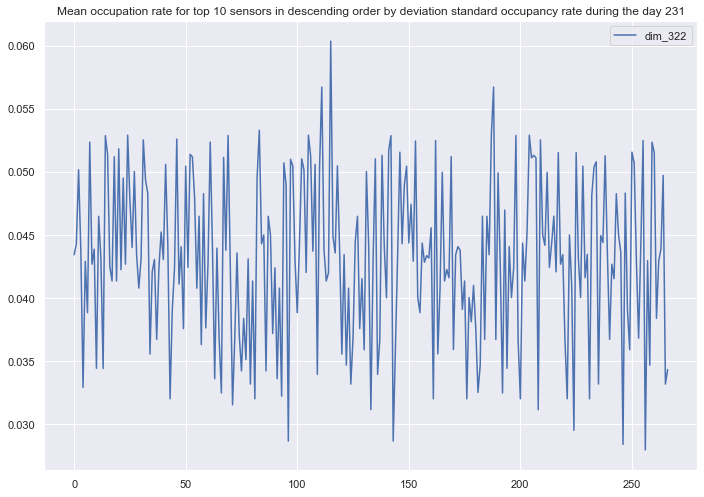

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1)
plt.title('Mean occupation rate for top 10 sensors in descending order by deviation standard occupancy rate during the day ' + str(day))
sns.lineplot(data=daily_mean_occupation_rate_per_sensor3[[ordered_sensor[0]]])
plt.savefig('PEMS-SF_graphs/PEMS-SF_todo1.png')

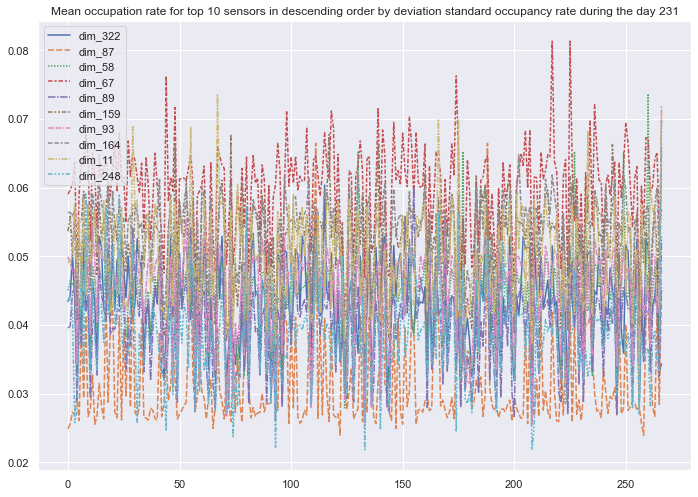

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1)
plt.title('Mean occupation rate for top 10 sensors in descending order by deviation standard occupancy rate during the day ' + str(day))
sns.lineplot(data=daily_mean_occupation_rate_per_sensor3[ordered_sensor])
plt.savefig('PEMS-SF_graphs/PEMS-SF_todo2.png')

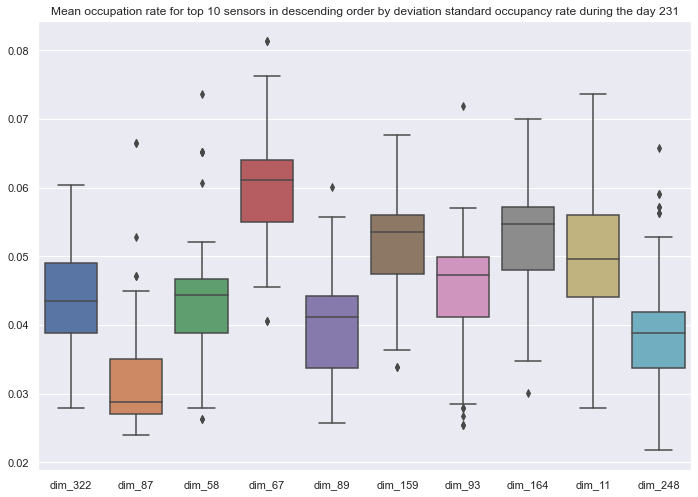

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1)
plt.title('Mean occupation rate for top 10 sensors in descending order by deviation standard occupancy rate during the day ' + str(day))
sns.boxplot(data=daily_mean_occupation_rate_per_sensor3[ordered_sensor])
plt.savefig('PEMS-SF_graphs/PEMS-SF_todo3.png')

In [31]:
# Graph 3.3
# media zilnica a ratei de ocupare pentru fiecare senzor
daily_mean_occupation_rate_per_sensor3 = pd.DataFrame()


# init dict list
dim_list = {'day': [], 'sensor': [], 'mean': [], 'std': []}

for dim in train_x:
    for day in range(train_x.shape[0]):
        dim_list['day'].append(day)
        dim_list['sensor'].append(dim)
        tmp = train_x[dim][day].describe()['mean']
        dim_list['mean'].append(tmp)
        dim_list['std'].append(tmp)


In [32]:
all_mean_day = pd.DataFrame(dim_list)

In [33]:
all_mean_day.sort_values('std')[0:10]

,day,sensor,mean,std
111775,169,dim_418,0.000000,0.000000
195987,9,dim_734,0.000000,0.000000
81442,7,dim_305,0.000000,0.000000
81496,61,dim_305,0.000000,0.000000
196241,263,dim_734,0.000000,0.000000
111834,228,dim_418,0.000742,0.000742
111656,50,dim_418,0.000742,0.000742
100796,137,dim_377,0.000869,0.000869
938,137,dim_3,0.000925,0.000925
96524,137,dim_361,0.000965,0.000965


In [34]:
top_10_lower_std = {'sensor': [], 'day': []}

for index, row in all_mean_day.sort_values('std')[0:10].iterrows():
    top_10_lower_std['sensor'].append(row['sensor'])
    top_10_lower_std['day'].append(row['day'])

In [35]:
top_10_lower_std

{'sensor': ['dim_418',
  'dim_734',
  'dim_305',
  'dim_305',
  'dim_734',
  'dim_418',
  'dim_418',
  'dim_377',
  'dim_3',
  'dim_361'],
 'day': [169, 9, 7, 61, 263, 228, 50, 137, 137, 137]}

In [36]:
top_series = []
top_series_label = []

for i in range(len(top_10_lower_std['sensor'])):
    top_series.append(train_x[top_10_lower_std['sensor'][i]].values[top_10_lower_std['day'][i]].to_numpy())
    
for i in range(len(top_10_lower_std['sensor'])):
    top_series_label.append(top_10_lower_std['sensor'][i] + '; day: ' + str(top_10_lower_std['day'][i]))

In [37]:
top_series

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [38]:
type(train_x['dim_418'].values[169].to_numpy())
train_x['dim_418'].values[169].to_numpy()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
top_series

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

<AxesSubplot:>

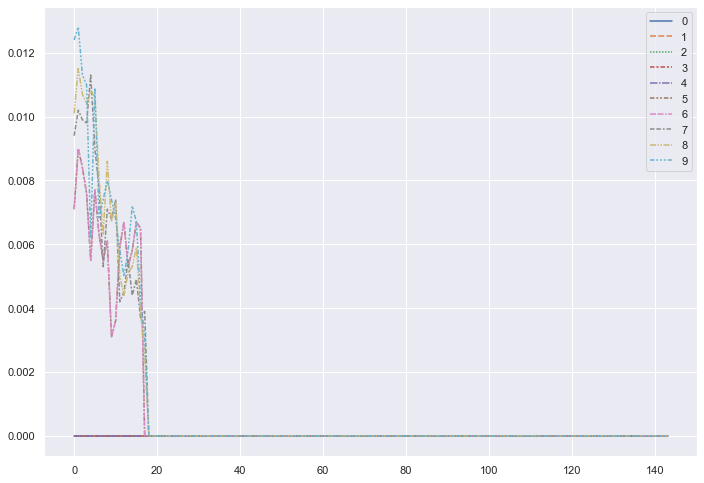

In [40]:
sns.lineplot(data=top_series)

In [41]:
my_tmp = {}

for i in range(len(top_series_label)):
    my_tmp[top_series_label[i]] = top_series[i]

In [42]:
my_tmp

{'dim_418; day: 169': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 'dim_734; day: 9': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
      

In [43]:
pd.DataFrame(my_tmp)

,dim_418; day: 169,dim_734; day: 9,dim_305; day: 7,dim_305; day: 61,dim_734; day: 263,dim_418; day: 228,dim_418; day: 50,dim_377; day: 137,dim_3; day: 137,dim_361; day: 137
0,0.0,0.0,0.0,0.0,0.0,0.0071,0.0071,0.0094,0.0101,0.0124
1,0.0,0.0,0.0,0.0,0.0,0.0090,0.0090,0.0102,0.0115,0.0128
2,0.0,0.0,0.0,0.0,0.0,0.0084,0.0084,0.0099,0.0107,0.0113
3,0.0,0.0,0.0,0.0,0.0,0.0076,0.0076,0.0098,0.0104,0.0110
4,0.0,0.0,0.0,0.0,0.0,0.0055,0.0055,0.0113,0.0108,0.0062
...,...,...,...,...,...,...,...,...,...,...
139,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
140,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
141,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
142,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000


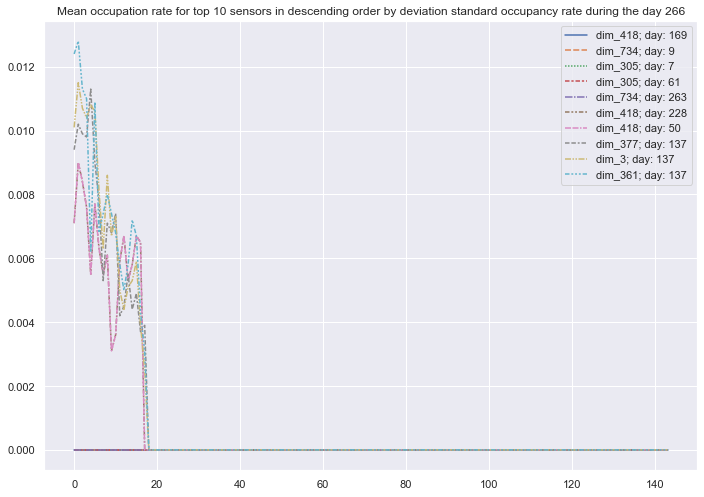

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1)
plt.title('Mean occupation rate for top 10 sensors in descending order by deviation standard occupancy rate during the day ' + str(day))
sns.lineplot(data=pd.DataFrame(my_tmp))
plt.savefig('PEMS-SF_graphs/PEMS-SF_top_10_mean_occupation_rate.png')